# Introduction to RNA sequencing and data display in Python

## This module defines differential expression and teaches the code to make some common displays for RNA seq data including heat map, cluster map, and violin plot. 

It's hard to believe, but a cell in a liver has the exact same set of DNA instructions as a neuron.  The only difference is in how those genes are expressed. Liver contains liver specific cells with entire programs of development and metabolism that are based on their identity as liver cells and vice versa for neurons. 

RNA-seq lets us measure this "activity identification" by measuring the abundance of the RNA transcript as a proxy to indicate activity in a cellular process. mRNA samples are isolated and sequenced, creating short fragments of DNA that line up more with one gene or another in a cDNA library that serves as a reference point. More actively expressed genes associate in greater numbers with the cDNA library and fluoresce more brightly to a camera.  The brightness or dimness is translated to numbers that become the matrix of data we analyze: differential gene expression.



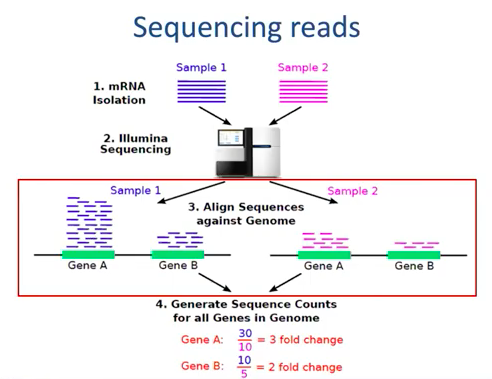

The data we will play with today is for demonstration purposes only. It has ten different experimental parameters. In our lab, we collect tissue around the vocal fold at different stages of mouse development below, so you can think of each ROW in our heatmap is a different stage of development in a mouse embryo below. "PO" means postnatal, the mouse is born!

(Image from: Badea A, Johnson GA. Magnetic resonance microscopy. Anal Cell Pathol (Amst). 2012;35(4):205-27. doi: 10.3233/ACP-2011-0050. PMID: 22142643; PMCID: PMC3508709.)

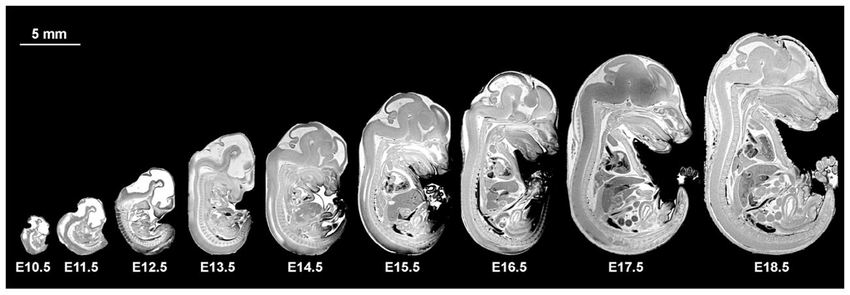

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Next we'll pull up the sequence data from our repository.  This is a tiny sample set of 99 genes, so we can store the data on Github, which is a place where computer programmers use and share programming code. In real life, scientists use special servers to hold the RNA sequencing data, which contains a little over 25,000 genes for each experimental parameter!  At the University of Wisconsin-Madison, many of those servers are in the basement of the Morgridge Institute for Research and/or the Discovery Center.

In [127]:
df = pd.read_csv('https://raw.githubusercontent.com/kwendt3/Fourier/main/1geneexpress.csv')

Let's take a look at our file, which shows a MATRIX of data, the framework computers need to look at data in flux.  Our matrix values are variance values that are determined by a baseline in the mouse genome.  At the top, we see our 99 sample genes. Each column represents a different gene, one of 99 for this study, and row represents a different location in the tissue, or perhaps a different timepoint that tissue was collected, one of ten in this study. The command "df.head" is a nice way to just check to make sure our dataframe looks good, and to tell us just how many rows and columns we have in case we need to code around it. Looking great!  Remember, we named our data frame "df" in the line above, but we can call it whatever we want. 

In [128]:
df.head(99)

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_90,gene_91,gene_92,gene_93,gene_94,gene_95,gene_96,gene_97,gene_98,gene_99
0,55.17,55.04,54.68,54.98,11.01,55.27,100.86,54.18,55.83,12.29,...,9.28,99.62,54.35,55.13,54.43,9.63,54.28,55.45,102.27,54.34
1,51.84,52.23,55.86,55.87,19.56,56.45,91.50,53.34,52.36,20.74,...,21.63,89.99,55.10,53.22,55.12,21.38,55.82,53.98,89.41,54.18
2,55.91,55.03,57.09,56.15,31.63,54.77,78.21,54.42,56.04,31.45,...,27.83,81.68,52.87,54.95,51.95,30.10,53.95,54.06,81.69,53.17
3,56.87,56.36,53.82,53.80,39.77,55.11,69.32,54.18,55.66,42.72,...,40.92,69.70,55.39,55.36,54.71,40.06,57.27,56.69,70.10,56.18
4,55.70,56.13,54.42,57.93,49.66,53.12,61.47,57.59,53.64,49.53,...,47.86,59.14,56.43,55.30,55.47,51.89,54.42,53.13,62.20,56.07
5,54.62,53.29,55.52,56.52,61.49,54.88,51.64,55.30,54.58,60.82,...,58.91,49.31,56.49,56.11,54.77,60.69,52.86,55.71,49.71,55.45
6,55.24,54.39,56.63,53.80,68.14,53.87,38.72,54.50,55.22,71.03,...,70.95,39.50,53.13,54.44,57.35,70.34,57.21,54.14,39.84,55.34
7,54.10,56.40,53.67,54.90,80.15,54.97,29.84,57.66,54.50,79.86,...,79.45,28.86,55.06,55.32,56.07,80.11,54.10,54.25,30.70,54.69
8,53.80,55.83,55.00,53.89,91.10,52.09,20.38,54.28,56.37,86.50,...,89.22,20.64,54.06,54.09,53.61,89.85,57.31,54.50,18.65,54.58
9,54.89,55.76,54.52,54.77,101.56,53.96,10.98,55.38,52.94,100.31,...,99.43,11.25,56.90,55.23,55.57,96.61,57.12,56.12,7.95,55.96


Looking at our data, it's hard to tell visually what's going on.  It just looks like a bunch of NUMBERS. To observe changes in the data over time, scientists convert the numbers to colors that correspond with raising or lowering levels.  This is called a heatmap.  In the command below, we'll generate a heatmap of the entire matrix of data. So higher numbers are beige, and lower numbers are black. 

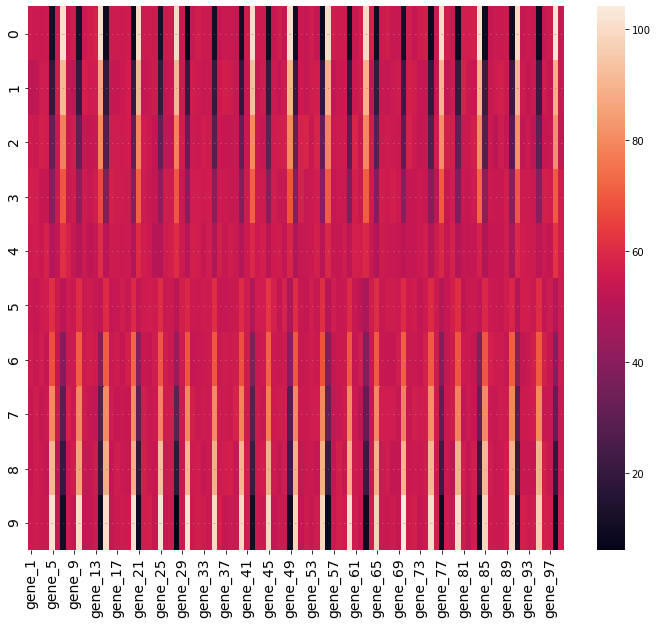

In [129]:
ax = sns.heatmap(df, annot=True, annot_kws = {'size':1})
ax.tick_params(labelsize=14)
ax.figure.set_size_inches((12, 10))


Now that we have a heatmap of the entire matrix, let's take a look at what's really going on in each column of data, since each column represents gene expression.  This is called normalization, because it NORMALIZES variations by a group that you pick out.  In our case, the "group" is/are the gene(s) of interest.  You can change the color scale of your heatmap to whatever you want using the cmap command.  Here are some common choices: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html.  Now is a good time too to label our Y axis by the day that we collected our data.

<AxesSubplot:>

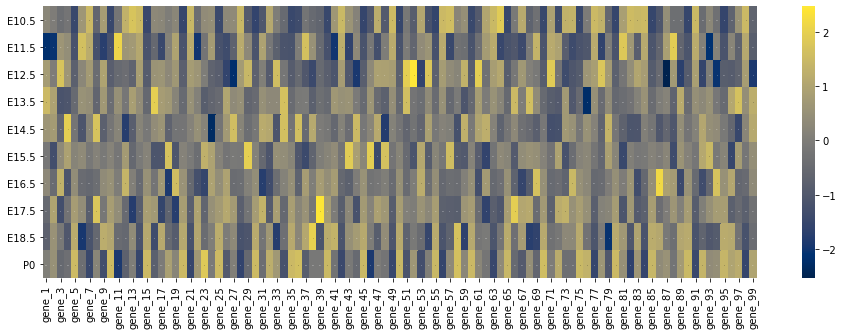

In [130]:
y_axis_labels = ["E10.5","E11.5","E12.5","E13.5","E14.5","E15.5","E16.5","E17.5","E18.5","P0"] # labels for y-axis
df_norm_col=(df-df.mean())/df.std()
plt.figure(figsize = (16,5))
sns.heatmap(df_norm_col, annot=True, annot_kws = {'size':1}, cmap='cividis', yticklabels=y_axis_labels)

After obtaining lists of genes that were differentially expressed across the ten conditions. we used these genes as input for clustering to define the prevalent patterns of gene expression. A heat map provides a way to visually assess the results of clustering on the data, enabling the investigator and reader to observe trends of expression for genes across populations, treatment conditions, or time points

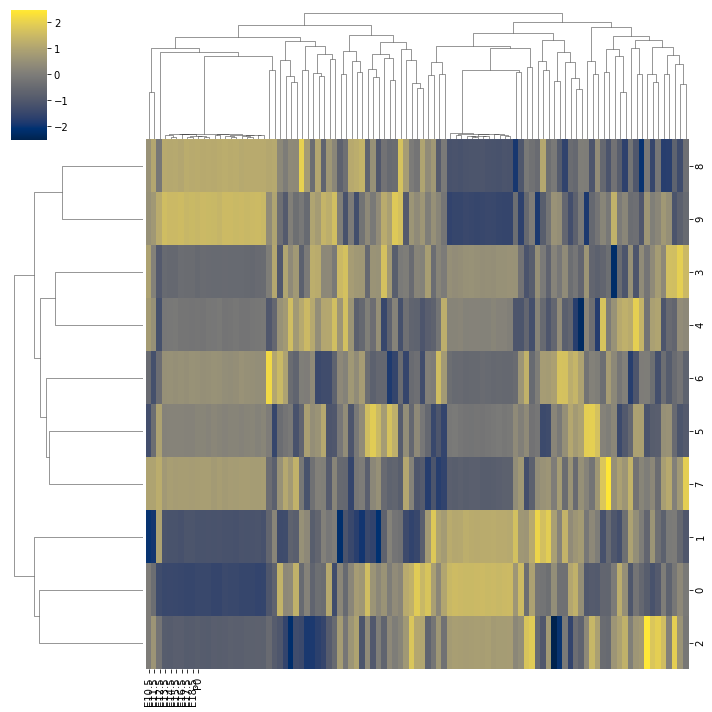

In [131]:
x_axis_labels = ["E10.5","E11.5","E12.5","E13.5","E14.5","E15.5","E16.5","E17.5","E18.5","P0"] # labels for x-axis
g = sns.clustermap(df_norm_col, xticklabels=y_axis_labels, cmap='cividis')

In [132]:
df.head(99)

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_90,gene_91,gene_92,gene_93,gene_94,gene_95,gene_96,gene_97,gene_98,gene_99
0,55.17,55.04,54.68,54.98,11.01,55.27,100.86,54.18,55.83,12.29,...,9.28,99.62,54.35,55.13,54.43,9.63,54.28,55.45,102.27,54.34
1,51.84,52.23,55.86,55.87,19.56,56.45,91.50,53.34,52.36,20.74,...,21.63,89.99,55.10,53.22,55.12,21.38,55.82,53.98,89.41,54.18
2,55.91,55.03,57.09,56.15,31.63,54.77,78.21,54.42,56.04,31.45,...,27.83,81.68,52.87,54.95,51.95,30.10,53.95,54.06,81.69,53.17
3,56.87,56.36,53.82,53.80,39.77,55.11,69.32,54.18,55.66,42.72,...,40.92,69.70,55.39,55.36,54.71,40.06,57.27,56.69,70.10,56.18
4,55.70,56.13,54.42,57.93,49.66,53.12,61.47,57.59,53.64,49.53,...,47.86,59.14,56.43,55.30,55.47,51.89,54.42,53.13,62.20,56.07
5,54.62,53.29,55.52,56.52,61.49,54.88,51.64,55.30,54.58,60.82,...,58.91,49.31,56.49,56.11,54.77,60.69,52.86,55.71,49.71,55.45
6,55.24,54.39,56.63,53.80,68.14,53.87,38.72,54.50,55.22,71.03,...,70.95,39.50,53.13,54.44,57.35,70.34,57.21,54.14,39.84,55.34
7,54.10,56.40,53.67,54.90,80.15,54.97,29.84,57.66,54.50,79.86,...,79.45,28.86,55.06,55.32,56.07,80.11,54.10,54.25,30.70,54.69
8,53.80,55.83,55.00,53.89,91.10,52.09,20.38,54.28,56.37,86.50,...,89.22,20.64,54.06,54.09,53.61,89.85,57.31,54.50,18.65,54.58
9,54.89,55.76,54.52,54.77,101.56,53.96,10.98,55.38,52.94,100.31,...,99.43,11.25,56.90,55.23,55.57,96.61,57.12,56.12,7.95,55.96


So, we're going to want to see how differential gene expression is distributed for our ten experimental parameters (0-9) for particular genes (gene_1-gene_99).  To do that, we need our data to be transposed so that the experimental parameters are in the columns, where Seaborn likes things.  Let's introduce the transposition as df2. 

In [133]:
df2 = pd.read_csv('https://raw.githubusercontent.com/kwendt3/Fourier/main/geneexpress_experiment.csv')

In [134]:
df2.head(10)

,E10.5,E11.5,E12.5,E13.5,E14.5,E15.5,E16.5,E17.5,E18.5,P0
0,55.17,51.84,55.91,56.87,55.70,54.62,55.24,54.10,53.80,54.89
1,55.04,52.23,55.03,56.36,56.13,53.29,54.39,56.40,55.83,55.76
2,54.68,55.86,57.09,53.82,54.42,55.52,56.63,53.67,55.00,54.52
3,54.98,55.87,56.15,53.80,57.93,56.52,53.80,54.90,53.89,54.77
4,11.01,19.56,31.63,39.77,49.66,61.49,68.14,80.15,91.10,101.56
5,55.27,56.45,54.77,55.11,53.12,54.88,53.87,54.97,52.09,53.96
6,100.86,91.50,78.21,69.32,61.47,51.64,38.72,29.84,20.38,10.98
7,54.18,53.34,54.42,54.18,57.59,55.30,54.50,57.66,54.28,55.38
8,55.83,52.36,56.04,55.66,53.64,54.58,55.22,54.50,56.37,52.94
9,12.29,20.74,31.45,42.72,49.53,60.82,71.03,79.86,86.50,100.31


Notice above that now each gene 1-10 is saved as a row 0-9.

In [135]:
df2 = df2.melt(var_name='Development', value_name='gene_distribution')
print (df2)

    Development  gene_distribution
0         E10.5              55.17
1         E10.5              55.04
2         E10.5              54.68
3         E10.5              54.98
4         E10.5              11.01
..          ...                ...
985          P0              96.61
986          P0              57.12
987          P0              56.12
988          P0               7.95
989          P0              55.96

[990 rows x 2 columns]


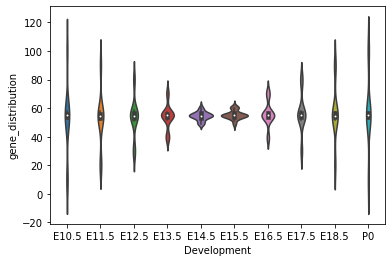

In [136]:
ax = sns.violinplot(x="Development", y="gene_distribution", data=df2)